In [ ]:
import easyocr
import glob 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import logging

# helper functions

In [ ]:
def plot_img_and_detection(img_path, extraction):
    label = img_path.split("/")[5]
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 8))
    img = plt.imread(img_path)
    ax[0].imshow(img, extent=[0, 400, 0, 600])
    ax[0].set_title(f'{label}', fontsize=15)
    ax[0].set_axis_off()
    for coords, text, confidence in extraction:
        x_min, y_min = coords[0]
        x_max, y_max = coords[2]
        width = x_max - x_min
        height = y_max - y_min

        rect = Rectangle(
            (x_min, y_min),
            width,
            height,
            linewidth=1.0,
            edgecolor="blue",
            facecolor="none",
        )
        ax[1].add_patch(rect)
        
        ax[1].text(
            x_min, y_max + 1.5, f"{text} ({confidence:.2f})", fontsize=8, color="black"
        )

    ax[1].set_xlim(0, 400)
    ax[1].set_ylim(0, 600)
    ax[1].invert_yaxis()  # invert axis for ocr context (origin at top left)...
    ax[1].set_axis_off()
    plt.show()


def extract_text_from_img(img):
    reader = easyocr.Reader(['en'])
    return reader.readtext(img)


# set datapath, def masks for data globbing...

In [62]:
mask = r'/Users/duuta/invoiceLLM/ghana_invoice_samples/*.[jp][pn][eg]*'
fps=glob.glob(mask)

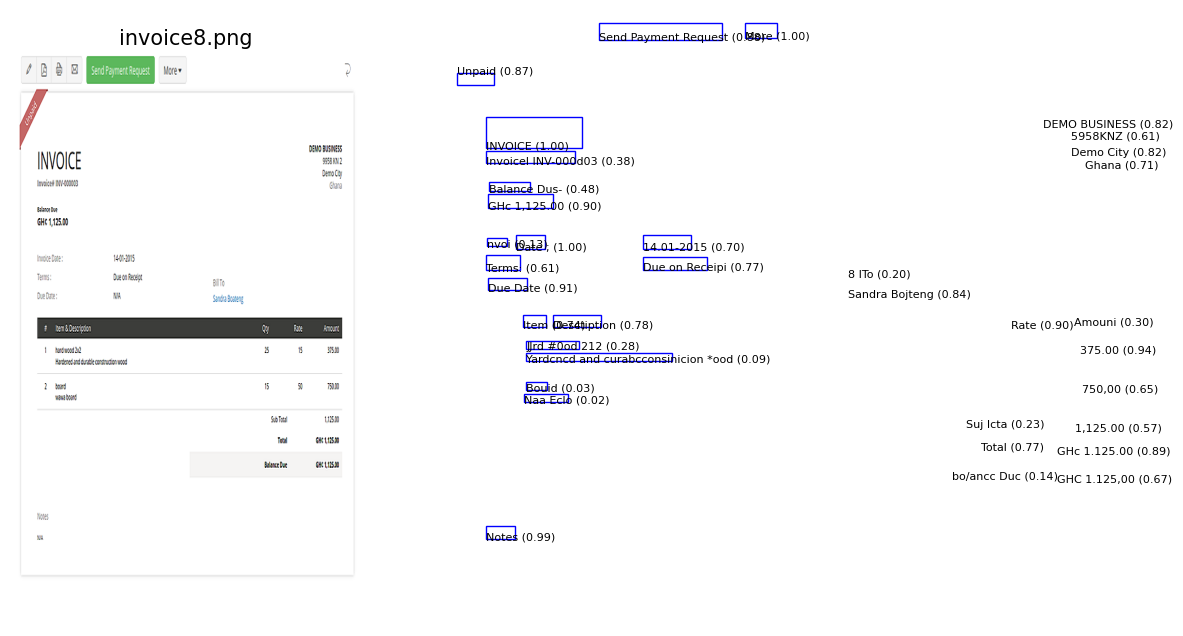

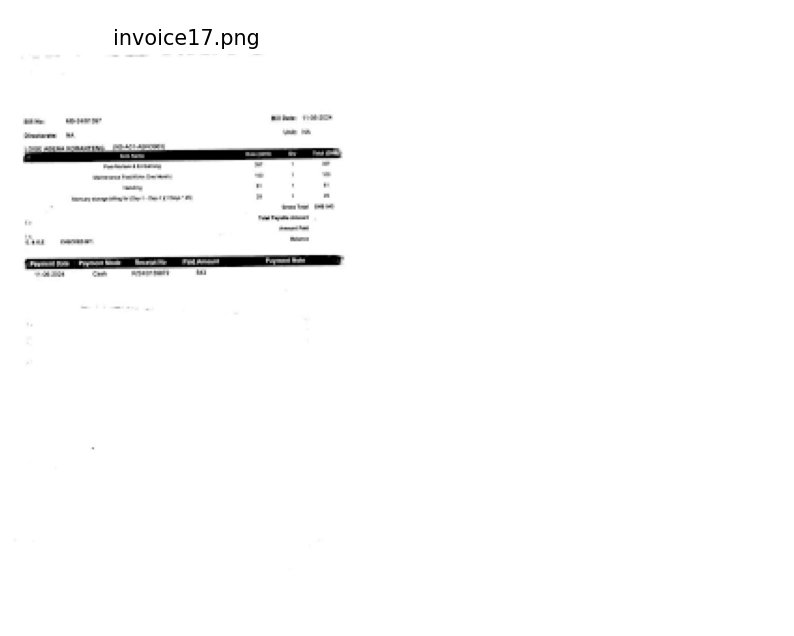

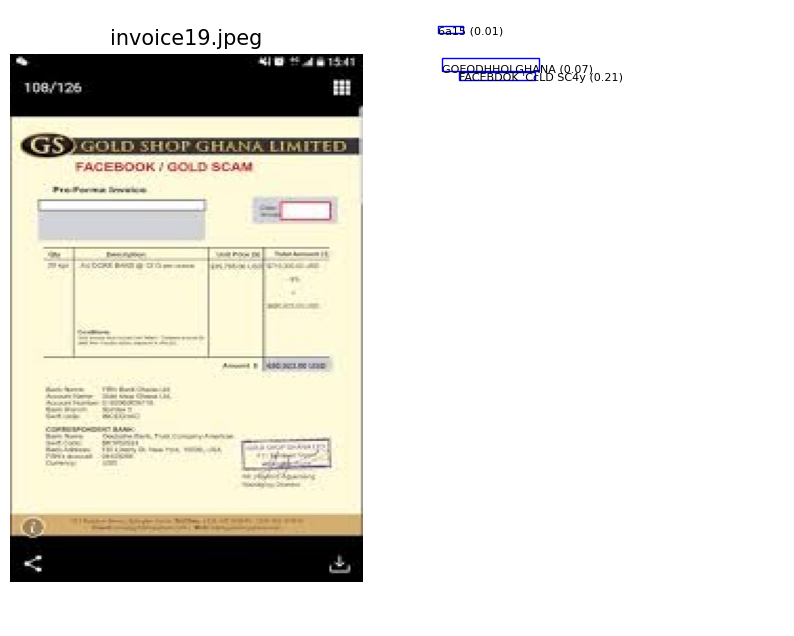

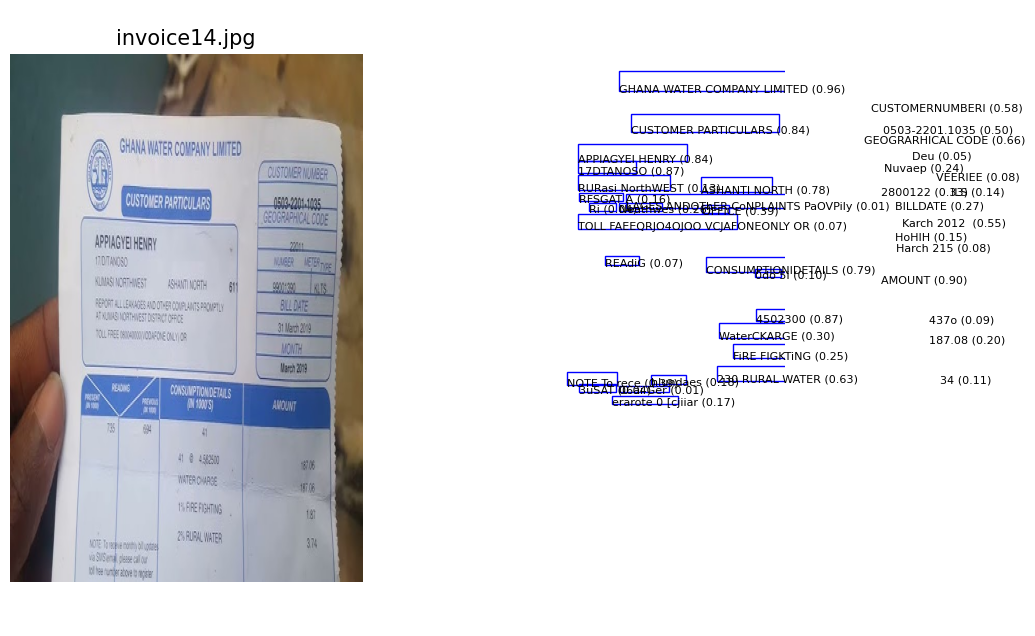

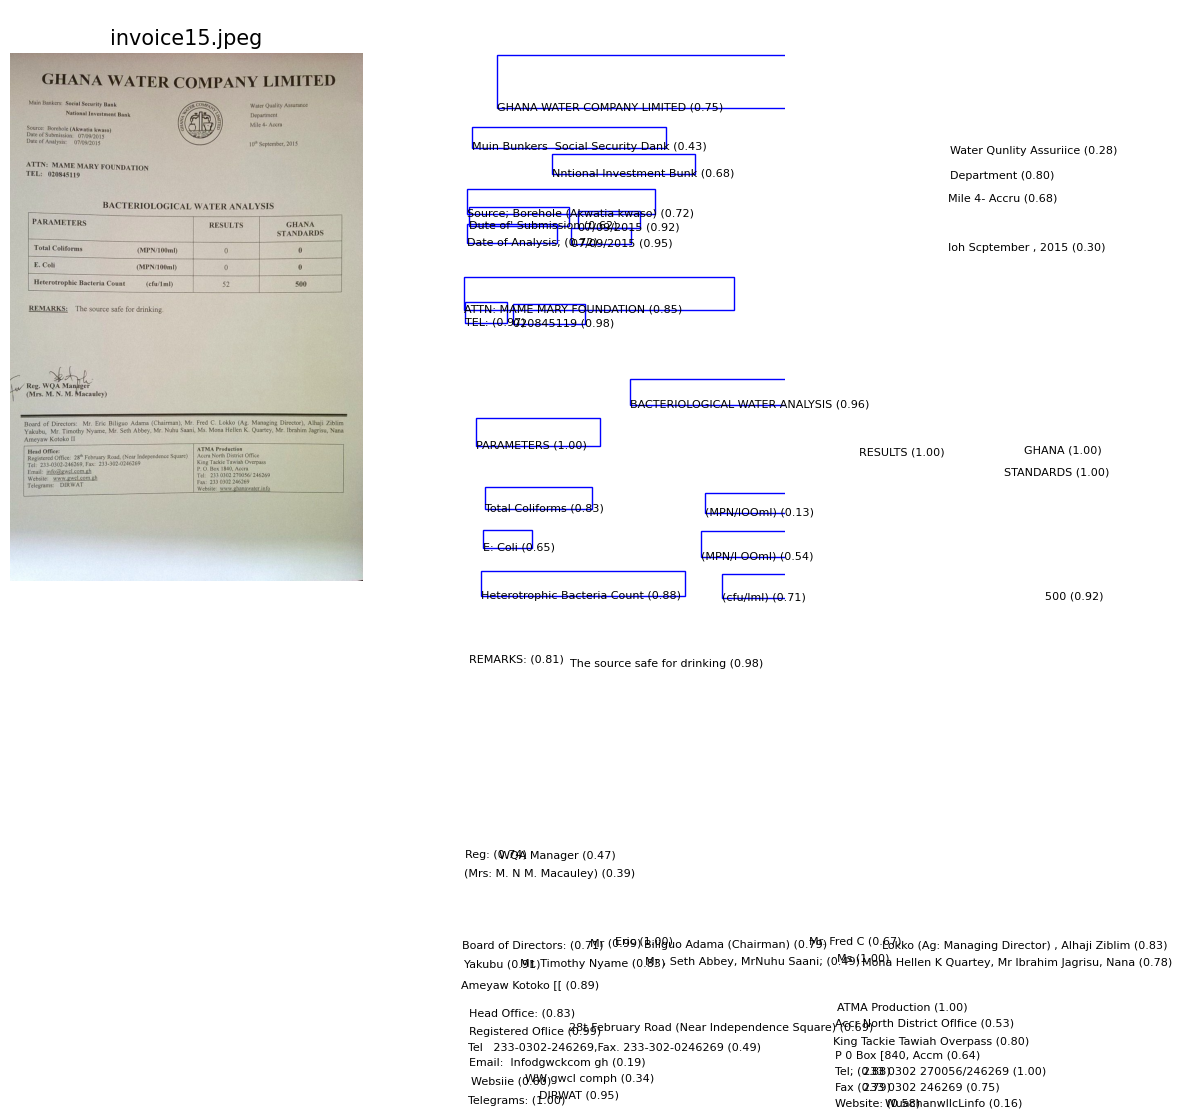

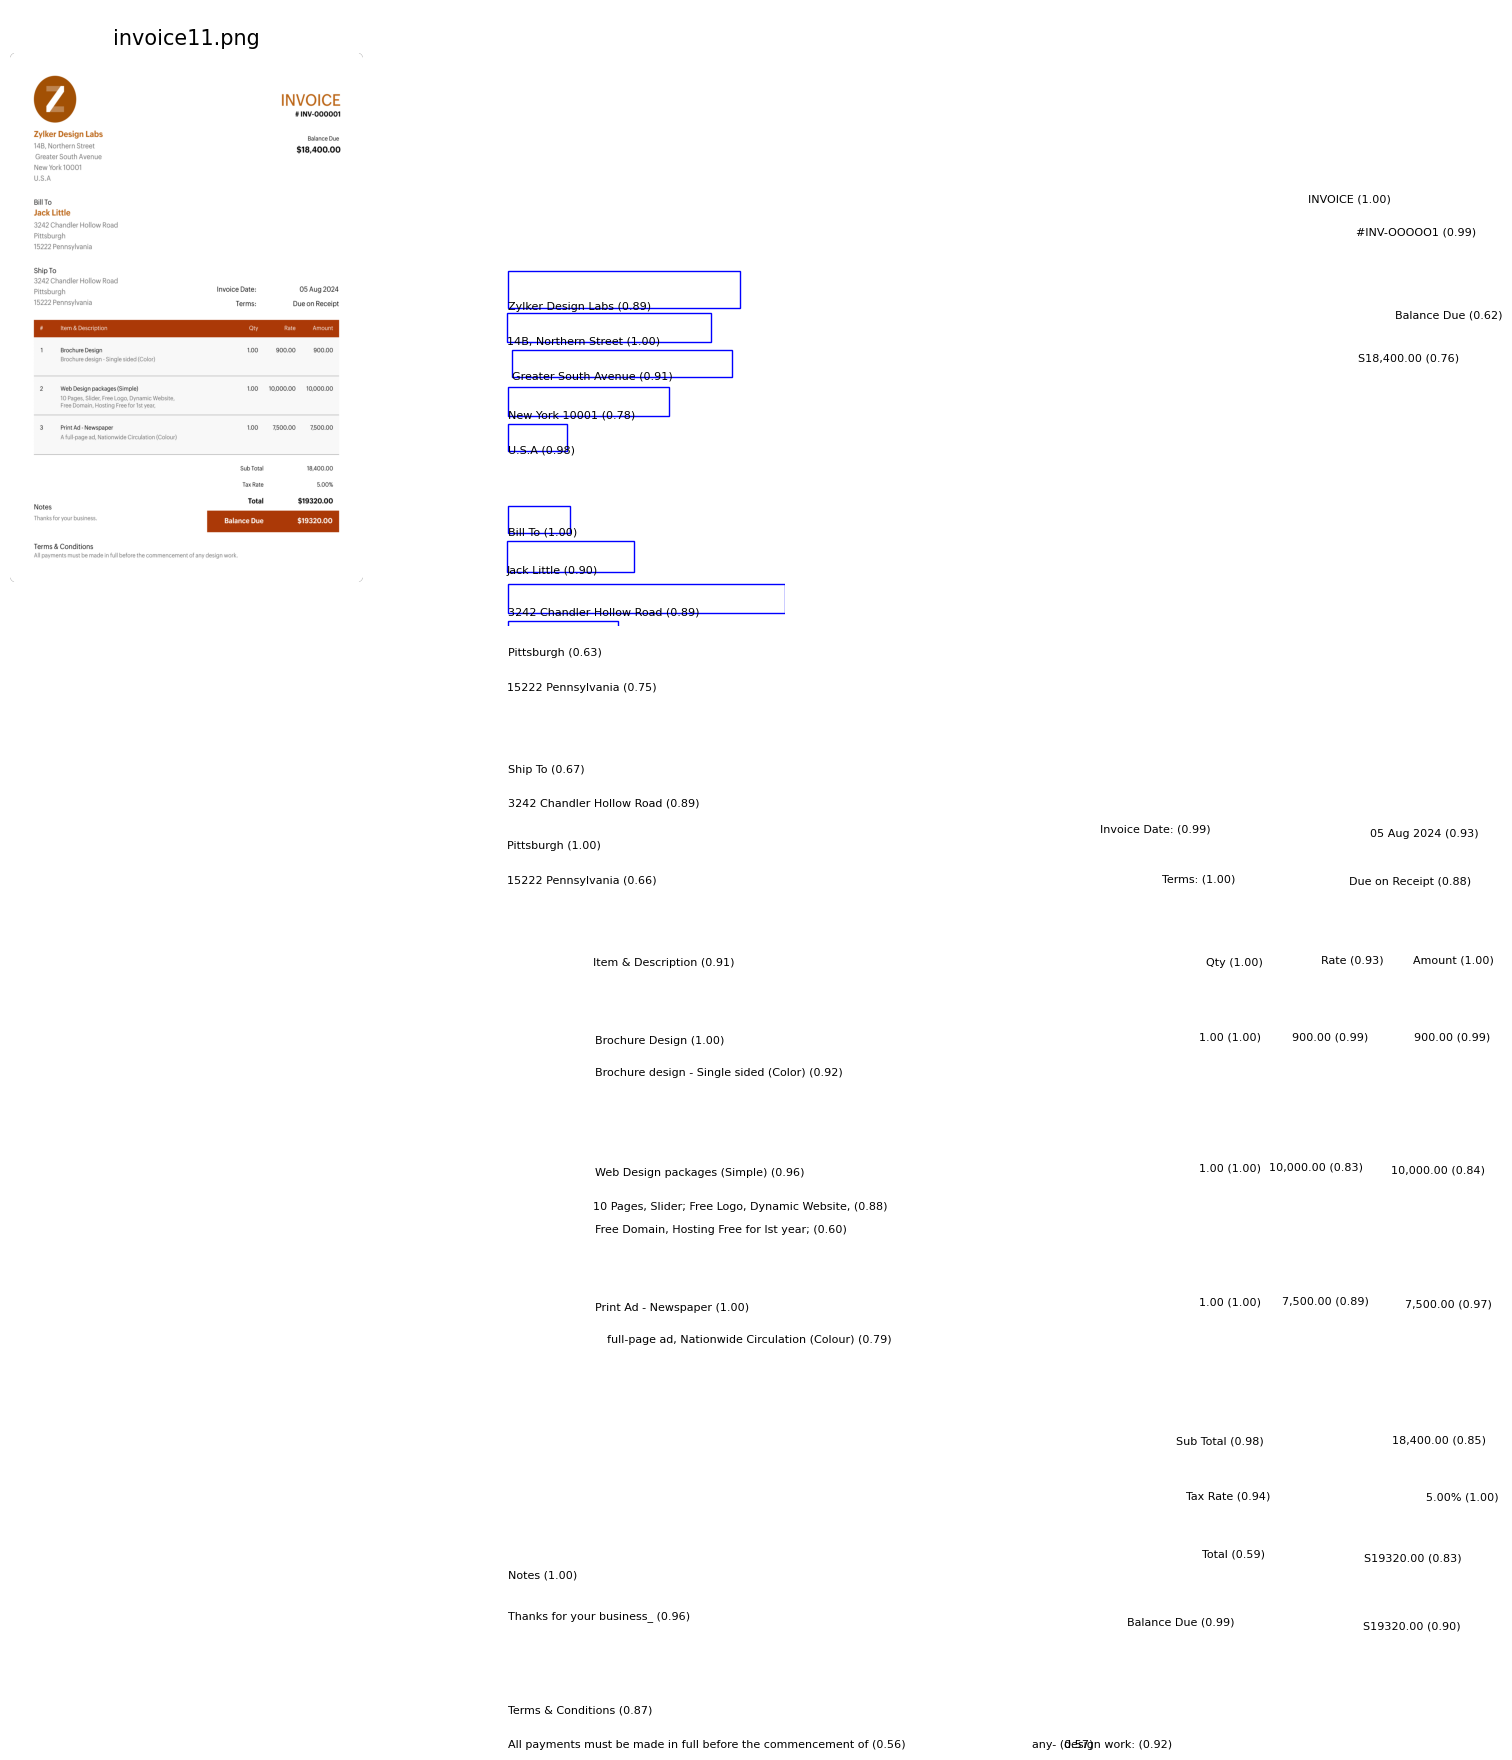

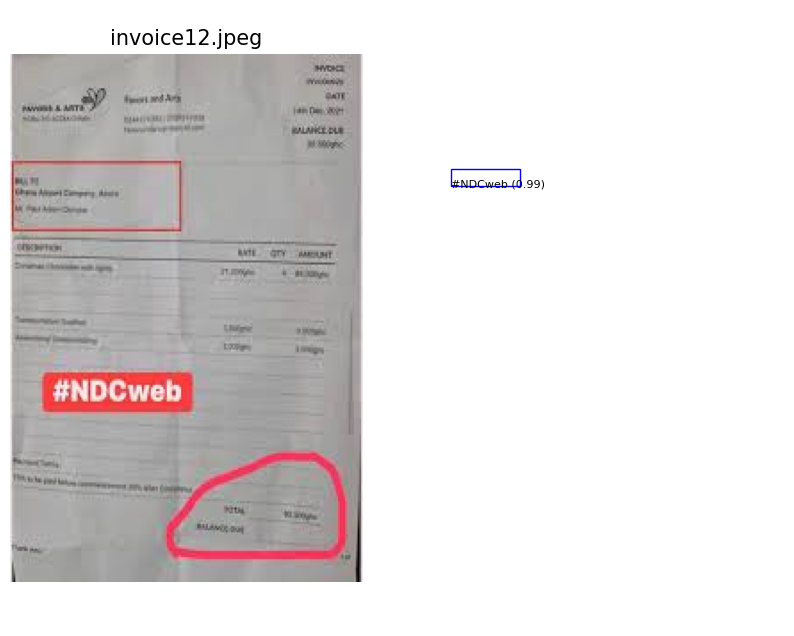

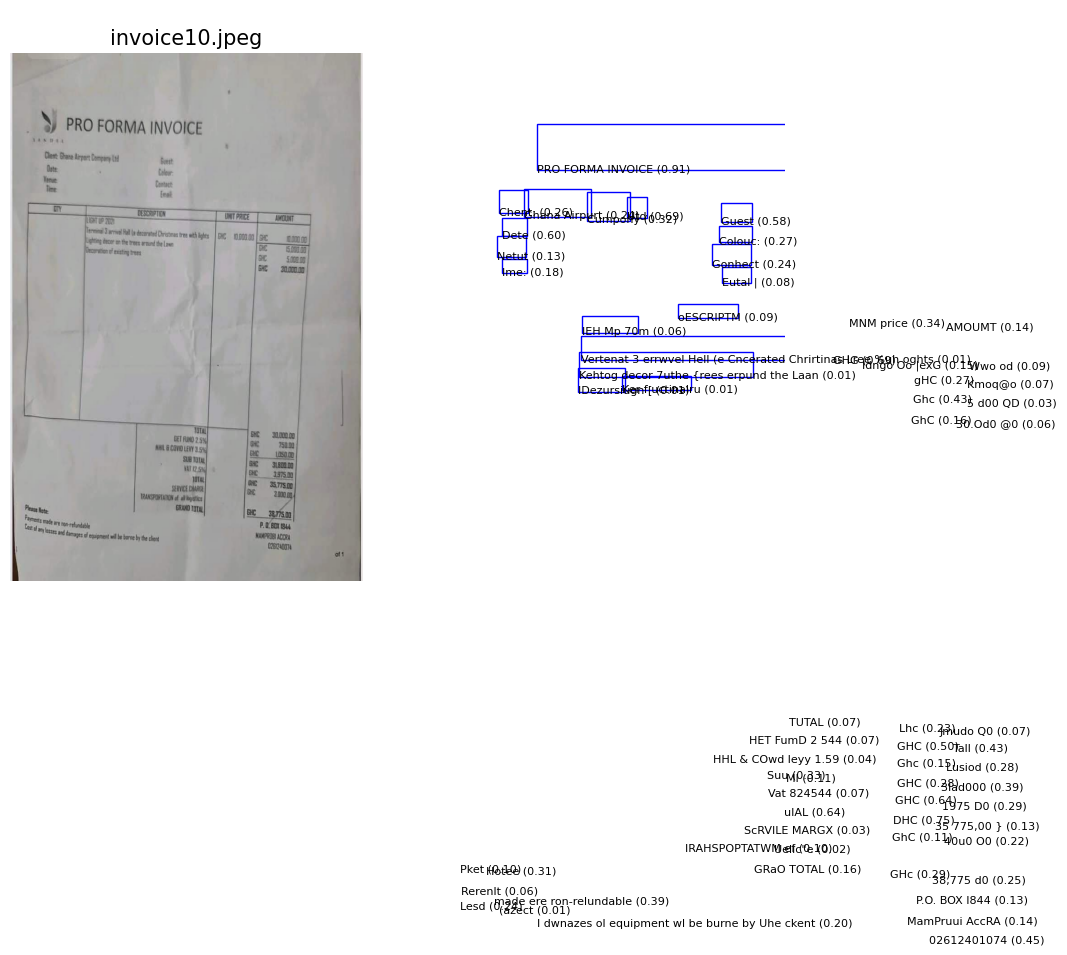

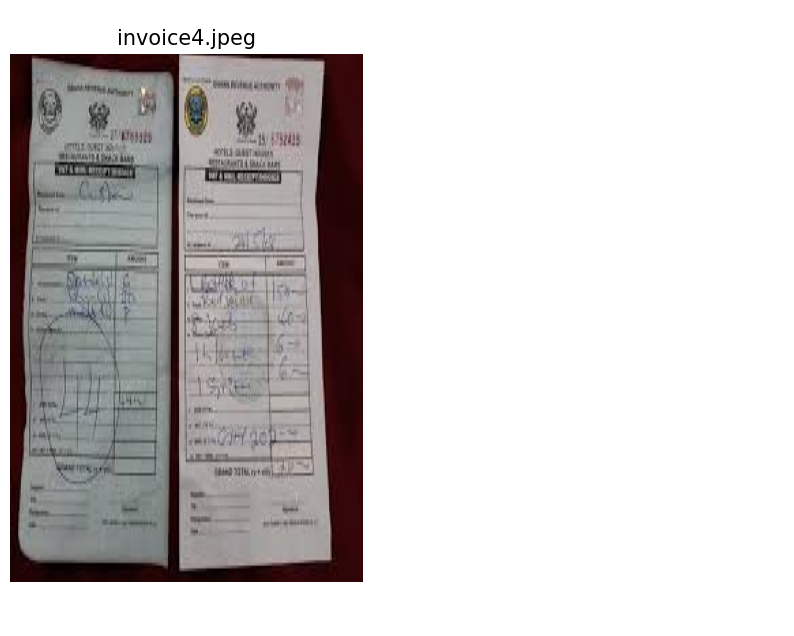

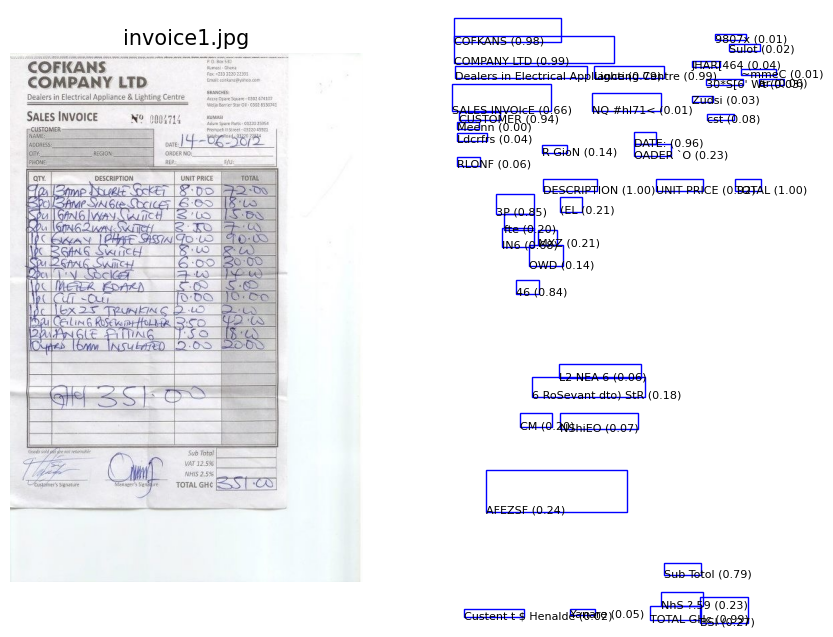

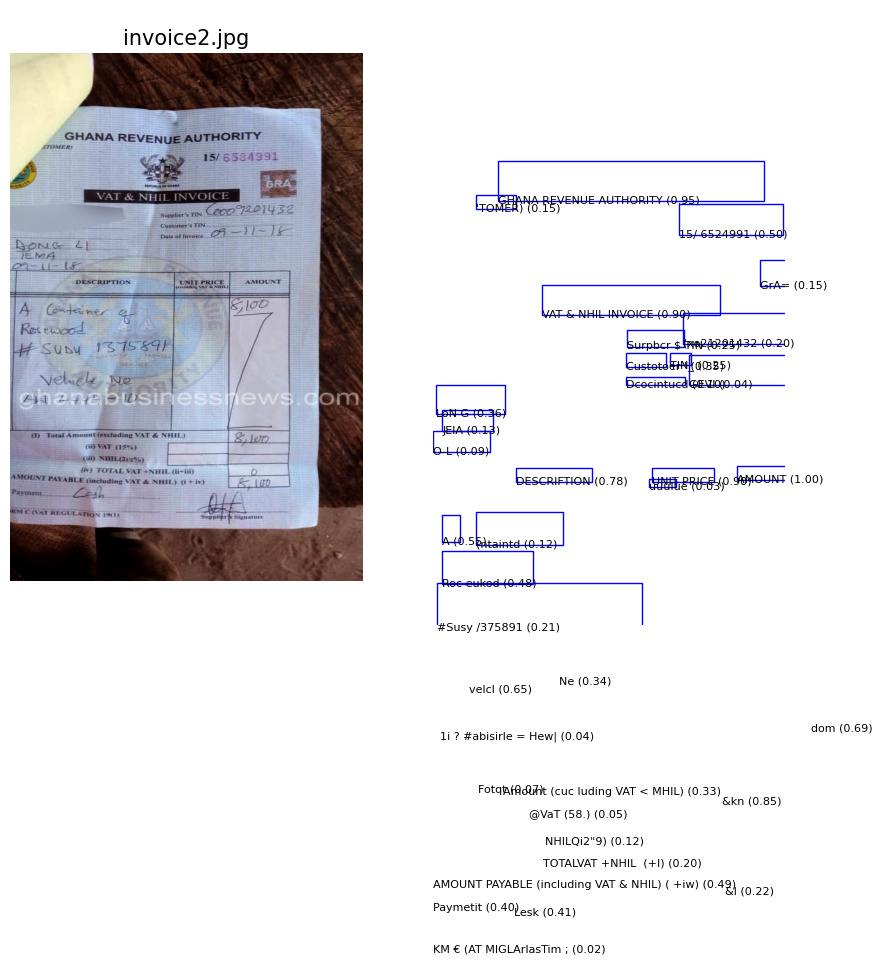

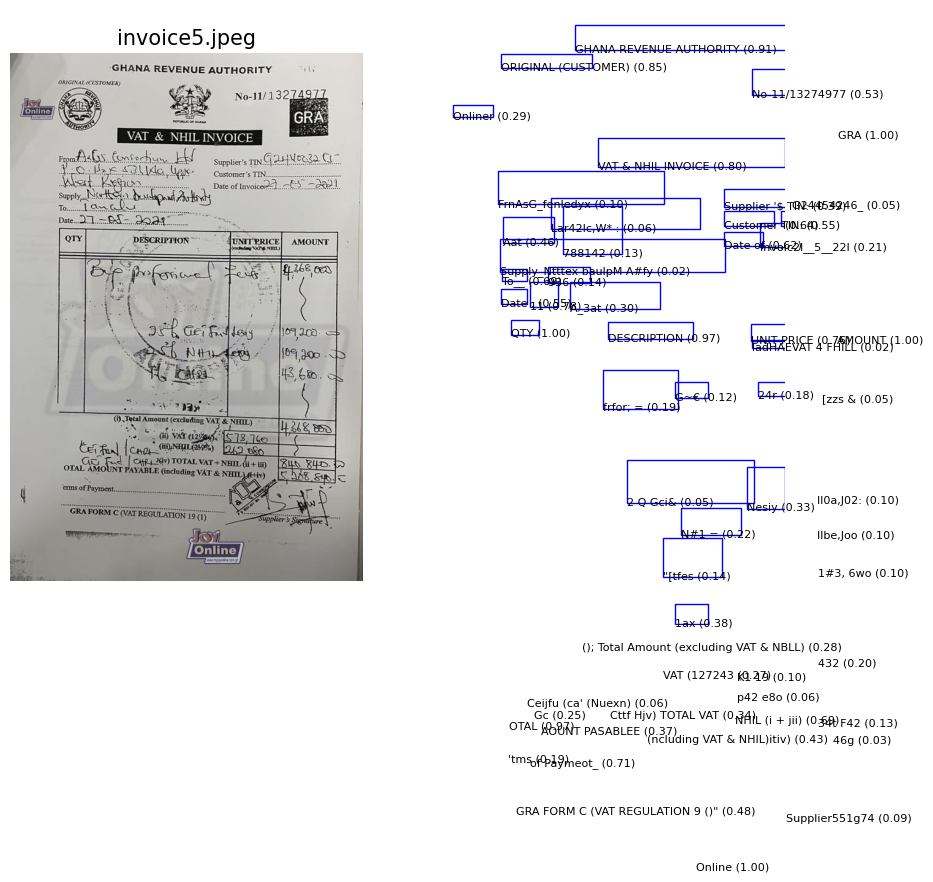

In [77]:
for img_path in fps:
    extraction = extract_text_from_img(img_path)
    plot_img_and_detection(img_path, extraction)